# Data science: From classical to Quantum models
###### By: J. A. Orduz

## Contents

1. [Modules, packages, and other tools](#packages)

1. [Versions packages](#versions)

1. [References](#references)


## Classical model world with data!

## Modules, packages, and other tools <a name="packages"></a>

To measure the elapsed time. 

In [1]:
import time 

In [2]:
start_time = time.time()

In [3]:
from platform import python_version
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

We introduce a line to draw the graphs in the nb

In [4]:
%matplotlib inline

We generate and plot the data set

In [5]:
n_samples = 200
m_columns = 4
 
dataSet = np.random.normal(loc=[-2, 2, -2, 2], scale=1, size=(n_samples, m_columns))
A = dataSet[:,[0,3]] #Xneg_Ypos
B = dataSet[:,[1,2]] #Xpos_Yneg
C = dataSet[:,[1,3]] #Xpos_Ypos
D = dataSet[:,[0,2]] #Xneg_Yneg

And we plot the data

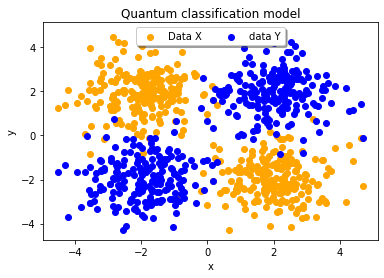

In [6]:
plt.scatter(A[:,0], A[:,1], color = "orange", label = "")
plt.scatter(B[:,0], B[:,1], color = "orange", label = "Data X")
plt.scatter(C[:,0], C[:,1], color = "blue", label = "")
plt.scatter(D[:,0], D[:,1], color = "blue", label = "data Y")
plt.ylabel("y")
plt.xlabel("x")
plt.title('Quantum classification model')
plt.legend(loc='upper center', ncol=2, shadow=True)
plt.savefig('figs/QuantumFunction.png', format='png',bbox_inches='tight',dpi=400)
plt.show()

We assign 0 to yellow, and 1 to blue points.

In [7]:
feature = np.concatenate([A, B, C, D], axis=0)
label = np.concatenate([np.ones(n_samples//2)*0, np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))
print(label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
dev = qml.device("default.qubit", wires = 2)

Values should between ``[0, 1]``.

We now create the model, and normalize to $0$ or $1.$ 

In [9]:
@qml.qnode(dev)
def model(x, w):
    
    qml.RX(x[0]*w[2], wires = 0)
    qml.RX(x[1]*w[3], wires = 1)
    
    qml.RX(w[0], wires = 0)
    qml.RX(w[1], wires = 1)
    qml.CNOT(wires = [1,0])
    
    return qml.expval(qml.PauliZ(wires = 0))

# def model(x, w):
#     return np.abs(np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2))

In [10]:
# basis_state = [0, 1]
# print(model(basis_state,x)) 

In [11]:
 
#  print(qml.draw(model)(basis_state,x))

In [12]:
#  import matplotlib.pyplot as plt
# fig, ax = qml.draw_mpl(model)(basis_state,x)
# plt.show()

We

In [13]:
limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)
    print(time.strftime("%H:%M:%S",time.gmtime(time.time() - start_time)))
    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange", label = "Data X")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue", label = "Data Y")
    plt.ylabel("y")
    plt.xlabel("x")
    plt.title('Quantum classification model')
    plt.legend(loc='upper center', ncol=2, shadow=True)
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im)
    plt.savefig('figs/Quantum_AFunction.png', format='png',bbox_inches='tight',dpi=400)
    plt.show()


We compute the error

In [14]:
def average_loss(w, data):
    losses = 0
    for x, y in data:
        losses += (model(x, w) - y) ** 2
    return losses/len(data)

In [15]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

We train

epoch 0 loss 0.27216702160314055
00:00:11


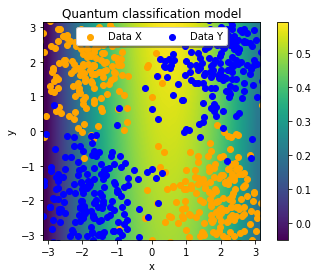

epoch 10 loss 0.24954017306855872
00:00:32


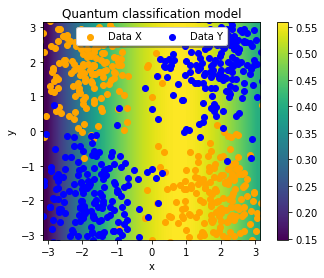

epoch 20 loss 0.24792089724029914
00:00:56


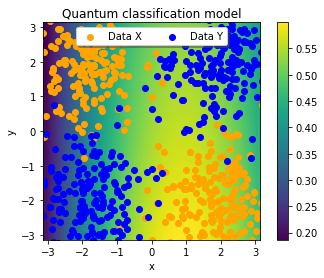

epoch 30 loss 0.2475217616326897
00:01:21


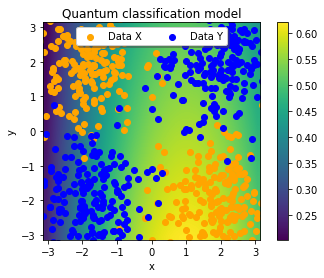

epoch 40 loss 0.2473833991807249
00:01:49


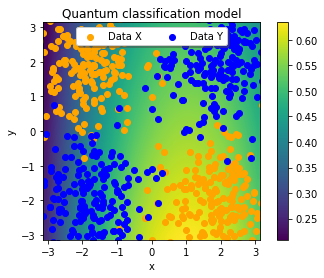

epoch 50 loss 0.24732469375081625
00:02:21


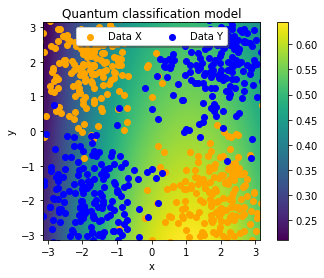

epoch 60 loss 0.2472951978886856
00:02:46


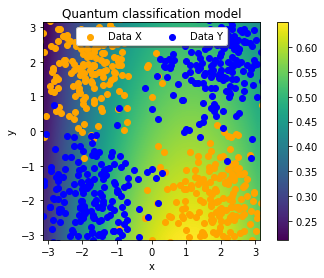

epoch 70 loss 0.24727768000991074
00:03:18


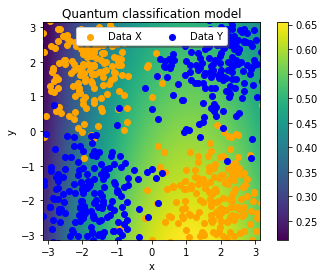

epoch 80 loss 0.247265487700375
00:03:42


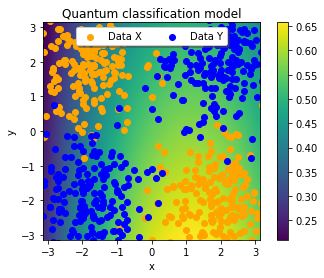

epoch 90 loss 0.24725583452554928
00:04:15


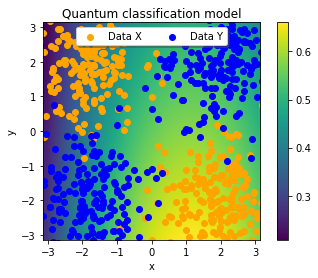

epoch 100 loss 0.24724747903646363
00:04:39


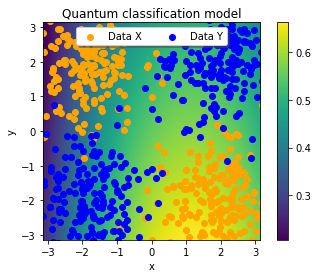

In [16]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 10 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)

## Version packages <a name="versions"></a>

In [17]:
print("python version: ", python_version())
print("pennylane version: ", qml.__version__)

python version:  3.7.9
pennylane version:  0.23.1


## References <a name="references"></a>


1. Tutorial: https://tinyurl.com/y6mh4bq8